# Plot Some Data

We read the JSON format output from _genome_entropy_, and create a dataframe that allows us to plot the data.

In this example, we plot protein entropy (from amino acids), against 3Di entropy.

In [2]:
import pandas as pd
import json

# Load the JSON file
with open('example_data/LT2.json', 'r') as f:
    data = json.load(f)

# Prepare a list to store extracted data
extracted_data = []

# Check if data is a list and not empty, then get the main dictionary
if data and isinstance(data, list) and isinstance(data[0], dict):
    main_data_dict = data[0]
    # Get the 'features' dictionary, which contains orf_ids as keys
    features_container = main_data_dict.get('features', {})

    # Iterate through orf_id and its details
    for orf_id, feature_details in features_container.items():
        metadata_in_genbank = feature_details.get('metadata', {}).get('in_genbank')
        dna_entropy = feature_details.get('entropy', {}).get('dna_entropy')
        protein_entropy = feature_details.get('entropy', {}).get('protein_entropy')
        three_di_entropy = feature_details.get('entropy', {}).get('three_di_entropy')

        extracted_data.append({
            'orf_id': orf_id,
            'metadata.in_genbank': metadata_in_genbank,
            'entropy.dna_entropy': dna_entropy,
            'entropy.protein_entropy': protein_entropy,
            'entropy.three_di_entropy': three_di_entropy
        })

# Create a pandas DataFrame
df_features = pd.DataFrame(extracted_data)

# Display the first 5 rows of the DataFrame
display(df_features.head())

,orf_id,metadata.in_genbank,entropy.dna_entropy,entropy.protein_entropy,entropy.three_di_entropy
0,orf1,True,1.988426,4.090755,2.698765
1,orf2,False,1.974809,3.826216,1.267215
2,orf3,True,1.989022,4.006490,2.638263
3,orf4,True,1.990366,4.147454,2.330840
4,orf5,True,1.997388,3.814883,3.223382


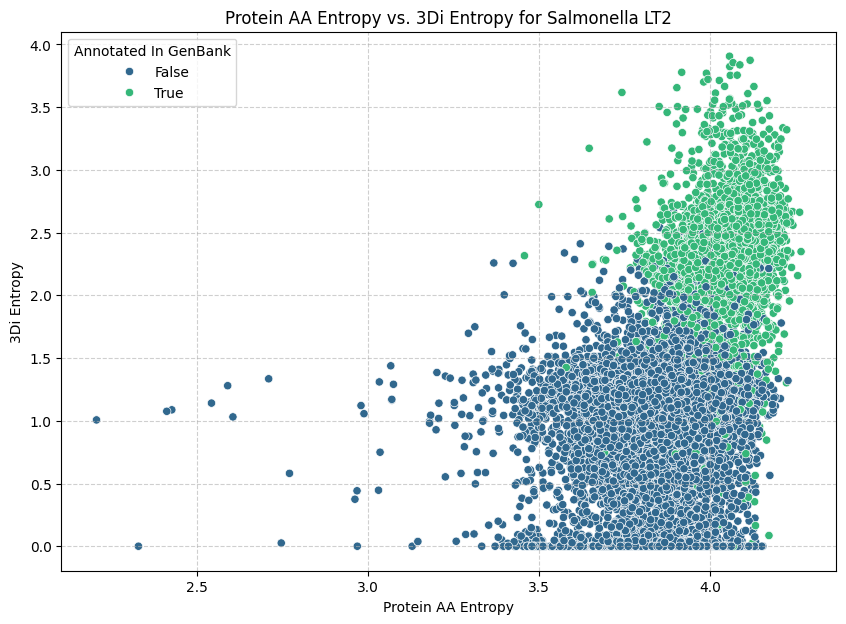

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_features,
    x='entropy.protein_entropy',
    y='entropy.three_di_entropy',
    palette='viridis',
    hue='metadata.in_genbank' # Color by this column
)

plt.title('Protein AA Entropy vs. 3Di Entropy for Salmonella LT2')
plt.xlabel('Protein AA Entropy')
plt.ylabel('3Di Entropy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Annotated In GenBank')
plt.show()